# Problem Set 9

## Fulin Guo

### 1.

#### a.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,LeaveOneOut, KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt
q1=pd.read_csv('/Users/fulinguo/Desktop/persp-model-econ_W19/ProblemSets/PS9/data/strongdrink.txt')
q1.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


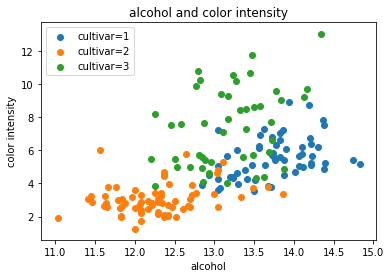

In [2]:
alco=q1['alco']
color=q1['color_int']
plt.scatter(q1[q1['cultivar']==1]['alco'],q1[q1['cultivar']==1]['color_int'],label='cultivar=1')
plt.scatter(q1[q1['cultivar']==2]['alco'],q1[q1['cultivar']==2]['color_int'],label='cultivar=2')
plt.scatter(q1[q1['cultivar']==3]['alco'],q1[q1['cultivar']==3]['color_int'],label='cultivar=3')
plt.xlabel('alcohol')
plt.ylabel('color intensity')
plt.title('alcohol and color intensity')
plt.legend()

#### b.

In [3]:
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
X=q1[['alco','malic','tot_phen','color_int']]
y=q1['cultivar']
LogReg = LogisticRegression(multi_class='multinomial',solver='saga')
# I use the solver 'saga' to fit the multinomial logistic regression
param_dist1 = {'penalty': ['l1', 'l2'],
             'C': sp_uniform(0.1, 10.0)}
random_search1=RandomizedSearchCV(LogReg, param_distributions=param_dist1,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search1.fit(X,y)
print('The optimal tuning parameter values are', random_search1.best_params_)
print('The MSE of the optimal results is', -random_search1.best_score_)
print("\n(Remark: If I do not specify multi_class='multinomial',solver='saga' in LogReg=LogisticRegression(), the result MSE are about 0.119, and 'C' would be about 2.666)")

The optimal tuning parameter values are {'C': 1.9591123209017924, 'penalty': 'l1'}
The MSE of the optimal results is 0.17045454545454544

(Remark: If I do not specify multi_class='multinomial',solver='saga' in LogReg=LogisticRegression(), the result MSE are about 0.119, and 'C' would be about 2.666)


/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### c.

In [4]:
from sklearn.ensemble import RandomForestClassifier
q2tree1=RandomForestClassifier()
param_dist2 = {'n_estimators': [10, 200],
             'max_depth': [2, 4],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20),
             'max_features': sp_randint(1, 4)}
random_search2=RandomizedSearchCV(q2tree1, param_distributions=param_dist2,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search2.fit(X, y)
print('The optimal tuning parameter values are', random_search2.best_params_)
print('The MSE of the optimal results are', -random_search2.best_score_)

The optimal tuning parameter values are {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 200}
The MSE of the optimal results are 0.13636363636363635


/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### d.

In [5]:
from sklearn import svm
from scipy.stats import uniform as sp_uniform
q2svm1=svm.SVC(kernel='rbf')
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False]}
random_search3=RandomizedSearchCV(q2svm1, param_distributions=param_dist3,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search3.fit(X, y)
print('The optimal tuning parameter values are', random_search3.best_params_)
print('The MSE of the optimal results are', -random_search3.best_score_)

The optimal tuning parameter values are {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
The MSE of the optimal results are 0.14772727272727273


/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### e.

In [6]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
param_dist4 = {'hidden_layer_sizes': sp_randint(1,100),
             'activation': ['logistic', 'relu'],
             'alpha': sp_uniform(0.1,10.0)}
random_search4=RandomizedSearchCV(mlp, param_distributions=param_dist4,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search4.fit(X, y)
print('The optimal tuning parameter values are', random_search4.best_params_)
print('The MSE of the optimal results are', -random_search4.best_score_)

The optimal tuning parameter values are {'activation': 'relu', 'alpha': 8.742419731112928, 'hidden_layer_sizes': 61}
The MSE of the optimal results are 0.2215909090909091


/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### f.

I think the random forest model in question (c) predicts the cultivar best because the MSE of the random forest model is the smallest among the four models